Librairies chargées.

--- 📅 KPI HEBDOMADAIRE (Anticipation de la Demande) ---


,Transaction ID,Total Spent,Quantity
Day_of_Week,,,
Monday,1441,12742.5,4330.0
Tuesday,1370,12642.5,4259.0
Wednesday,1407,12217.5,4150.0
Thursday,1426,12846.0,4326.0
Friday,1437,12770.0,4363.0
Saturday,1414,12630.5,4267.0
Sunday,1431,12755.0,4313.0



--- 🚀 KPI PRODUIT (Rentabilité) ---


,Total Spent,Quantity,Part_de_Marché (%)
Item,,,
Salad,19075.0,3815.0,21.53
Sandwich,13716.0,3429.0,15.48
Smoothie,13344.0,3336.0,15.06
Juice,10515.0,3505.0,11.87
Cake,10404.0,3468.0,11.74
Coffee,7756.0,3878.0,8.75
Tea,5433.0,3622.0,6.13
Unknown Item,4776.0,1370.0,5.39
Cookie,3585.0,3585.0,4.05



--- 📆 TENDANCE MENSUELLE ---


Month
January      7534.5
February     6898.0
March        7569.5
April        7531.0
May          7197.5
June         7666.0
July         7168.0
August       7442.5
September    7106.0
October      7693.5
November     7262.5
December     7535.0
Name: Total Spent, dtype: float64

C:\Users\doria\AppData\Local\Temp\ipykernel_20440\1009876007.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Day_of_Week', order=order_days, palette='viridis')


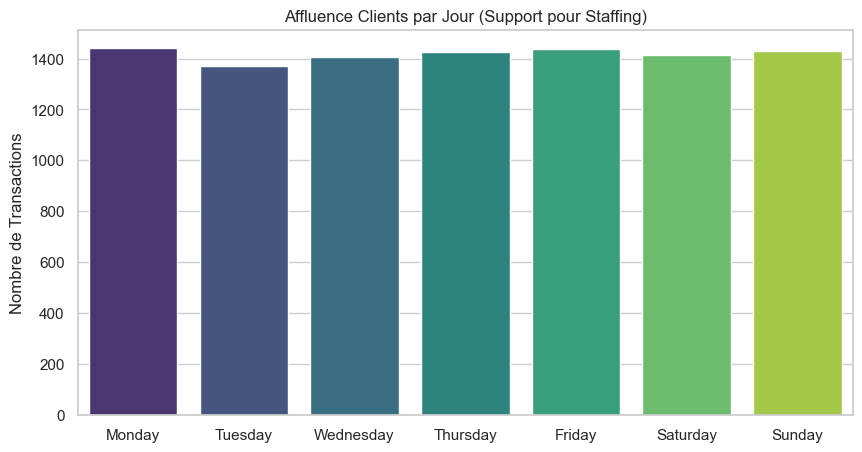

C:\Users\doria\AppData\Local\Temp\ipykernel_20440\1009876007.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Price_Category', order=['Low Cost', 'Medium Cost', 'High Cost'], palette='Set2')


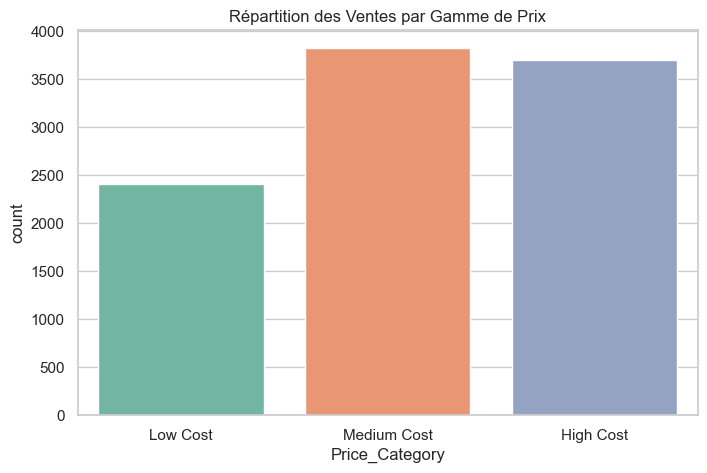

Fichier enrichi sauvegardé avec succès !


In [1]:
# --- CELLULE 1 : IMPORTATION ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Config Graphique
%matplotlib inline
sns.set_theme(style="whitegrid")
print("Librairies chargées.")

# --- CELLULE 2 : CHARGEMENT PROPRE ---
df = pd.read_csv('../DATA/PROCESSED/cleaned_cafe_sales.csv')
# On s'assure que la date est bien au format date
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# --- CELLULE 3 : FEATURE ENGINEERING (Création de colonnes) ---
# 1. Temporel
df['Month'] = df['Transaction Date'].dt.month_name()
df['Day_of_Week'] = df['Transaction Date'].dt.day_name()

# 2. Catégorie de Prix
def categoriser_prix(prix):
    if prix < 2.0: return 'Low Cost'
    elif prix < 4.0: return 'Medium Cost'
    else: return 'High Cost'

df['Price_Category'] = df['Price Per Unit'].apply(categoriser_prix)

# --- CELLULE 4 : ANALYSE DÉCISIONNELLE (KPIs) ---

# A. COURT TERME : Gestion Hebdomadaire
# On trie les jours
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
kpi_hebdo = df.groupby('Day_of_Week').agg({
    'Transaction ID': 'count', 
    'Total Spent': 'sum', 
    'Quantity': 'sum'
}).reindex(order_days)

print("\n--- 📅 KPI HEBDOMADAIRE (Anticipation de la Demande) ---")
display(kpi_hebdo)

# B. LONG TERME : Stratégie Produit
kpi_produit = df.groupby('Item').agg({
    'Total Spent': 'sum',
    'Quantity': 'sum'
}).sort_values('Total Spent', ascending=False)

# Part de marché
kpi_produit['Part_de_Marché (%)'] = (kpi_produit['Total Spent'] / df['Total Spent'].sum() * 100).round(2)

print("\n--- 🚀 KPI PRODUIT (Rentabilité) ---")
display(kpi_produit)

# C. SAISONNALITÉ : Chiffre d'Affaires Mensuel
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
kpi_mensuel = df.groupby('Month')['Total Spent'].sum().reindex(order_months)

print("\n--- 📆 TENDANCE MENSUELLE ---")
display(kpi_mensuel)

# --- CELLULE 5 : VISUALISATION ---

# Graphique 1 : Affluence par jour
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Day_of_Week', order=order_days, palette='viridis')
plt.title('Affluence Clients par Jour (Support pour Staffing)')
plt.xlabel('')
plt.ylabel('Nombre de Transactions')
plt.show()

# Graphique 2 : Répartition des prix
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Price_Category', order=['Low Cost', 'Medium Cost', 'High Cost'], palette='Set2')
plt.title('Répartition des Ventes par Gamme de Prix')
plt.show()

# --- CELLULE 6 : SAUVEGARDE FINALE ---
df.to_csv('../DATA/PROCESSED/final_enriched_data.csv', index=False)
print("Fichier enrichi sauvegardé avec succès !")